In [2]:
"""
This code is designed to plot the black hole mass vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os


c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[1.6492034e-08 5.2915480e-09 9.5454084e-08 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08] [3.7528293 1.7459352 1.4813268 ... 4.9593043 3.9385185 3.6280563]
[] []
[1.28858836e-05 4.25777692e-03 1.01256476e-01 ... 1.06147233e-06
 4.06880173e-07 7.23536992e-07] [412.51017831 116.72596498  55.14383858 ...  17.12659543  17.01357283
  11.74144176]
[2.35192860e-03 1.07717778e-02 5.24122480e-04 ... 1.17699652e-11
 4.62920010e-11 1.51236582e-12] [444.2855034  115.51431946 160.86654857 ...   9.40140242   9.073354
   9.42193682]
[4.89112848e-03 7.01522262e-06 3.45407384e-07 ... 2.40762760e-12
 2.01462772e-15 1.09372396e-10] [703.36876292 108.99852377 111.33540006 ...   9.99638323   8.70763212
   6.0295837 ]
[4.27138433e-02 1.94508120e-01 2.31054813e-01 ... 9.36308410e-04
 4.27761252e-15 9.56019794e-04] [11.19317818 14.11977482 15.34783649 ...  1.5148257   5.82417536
  1.76425898]


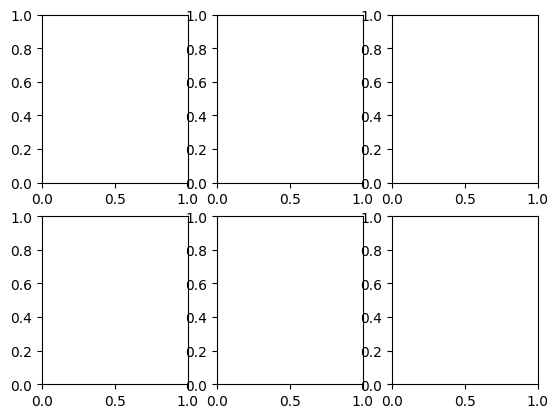

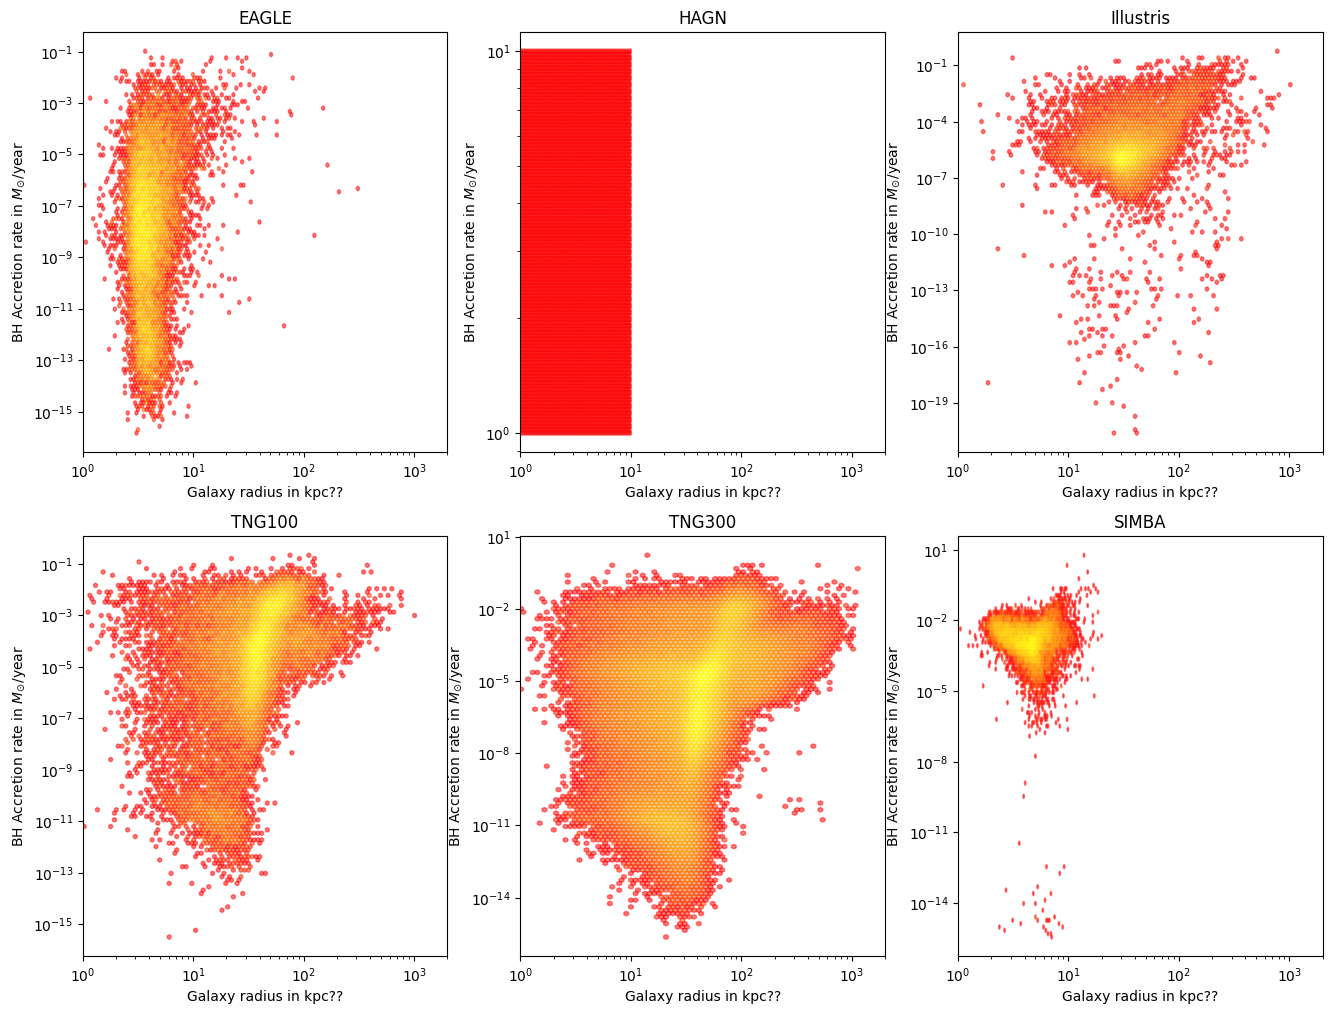

In [2]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['radius'].to_numpy()
    massBH = df['BHdot'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Galaxy radius in kpc??')
    axes[i][j].set_xlim([10**0, 2*10**3])
    axes[i][j].set_ylabel(r'BH Accretion rate in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/radius_vs_BHdot')
plt.show()

[1.6492034e-08 5.2915480e-09 9.5454084e-08 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08] [9.34215273e+37 2.99747439e+37 5.40713554e+38 ... 2.94220581e+39
 3.07949846e+40 1.55556656e+38]
[2.44180895e-01 2.17104120e-03 8.49498636e-04 ... 7.21987584e-08
 2.03751433e-08 2.23744668e-03] [1.38319823e+45 1.22981789e+43 4.81210869e+42 ... 4.08980377e+38
 1.15417965e+38 1.26743424e+43]
[1.28858836e-05 4.25777692e-03 1.01256476e-01 ... 1.06147233e-06
 4.06880173e-07 7.23536992e-07] [7.29939637e+40 2.41187972e+43 5.73582050e+44 ... 6.01286451e+39
 2.30483197e+39 4.09858061e+39]
[2.35192860e-03 1.07717778e-02 5.24122480e-04 ... 1.17699652e-11
 4.62920010e-11 1.51236582e-12] [1.33228419e+43 6.10183034e+43 2.96896808e+42 ... 6.66726812e+34
 2.62227778e+35 8.56701634e+33]
[4.89112848e-03 7.01522262e-06 3.45407384e-07 ... 2.40762760e-12
 2.01462772e-15 1.09372396e-10] [2.77065093e+43 3.97387497e+40 1.95661041e+39 ... 1.36383570e+34
 1.14121520e+31 6.19555858e+35]
[4.27138433e-02 1.94508120e-01 2.310

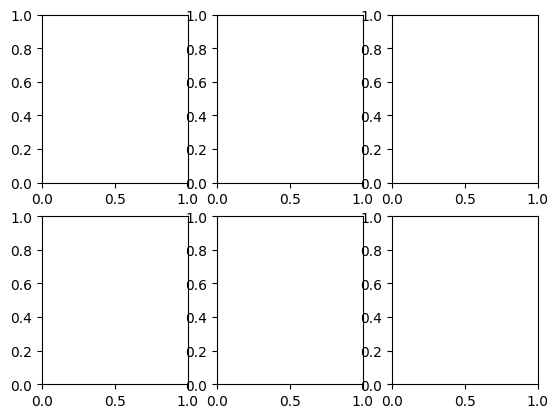

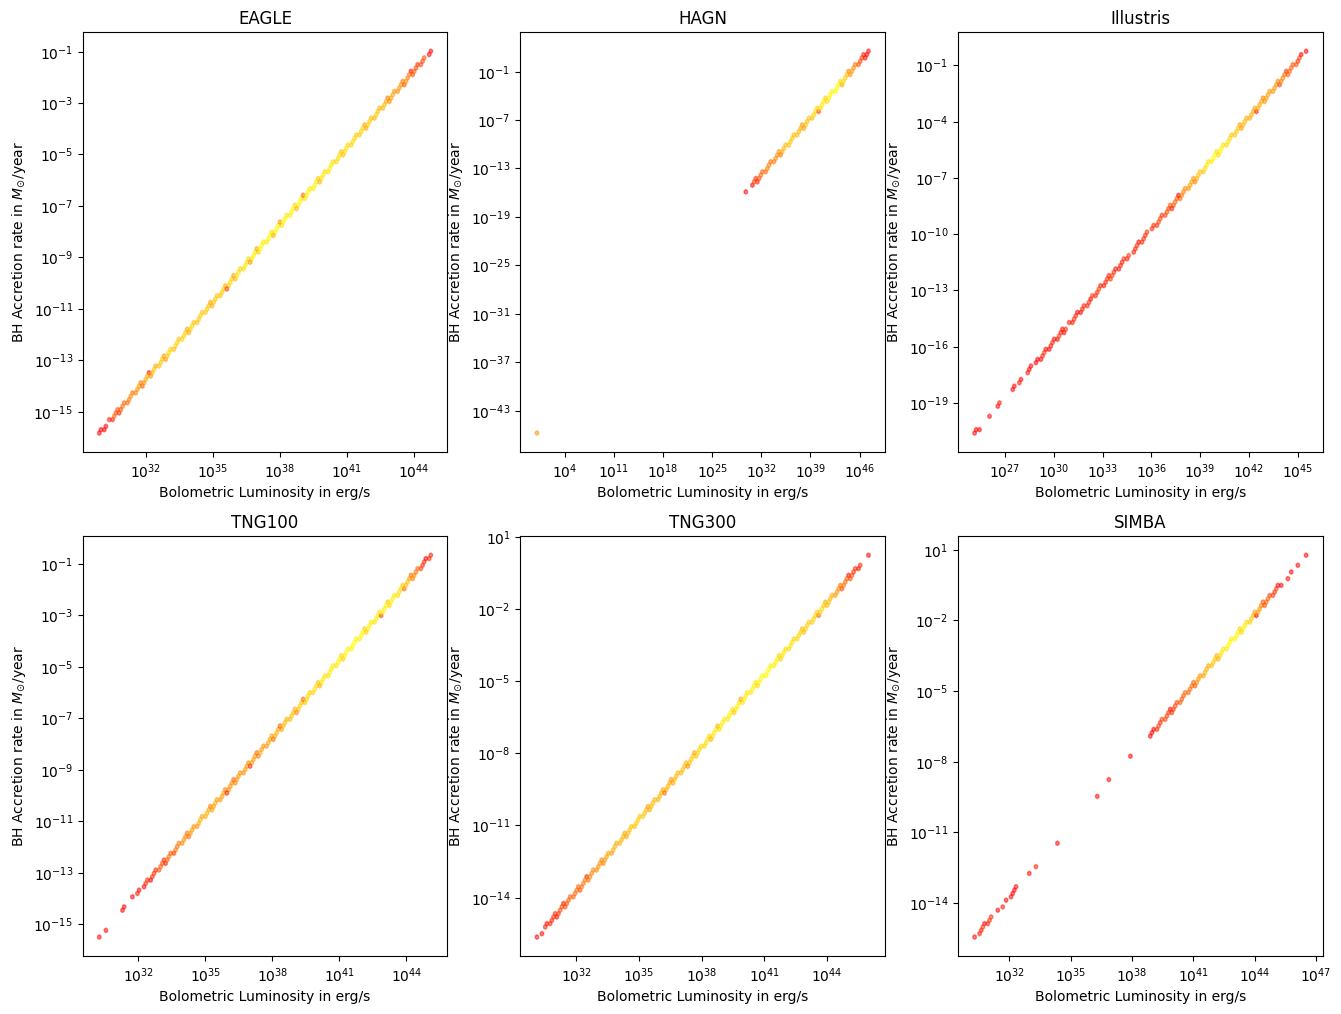

In [3]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['bolLum'] = 10**(df['bolLum'])
    stellar_mass = df['bolLum'].to_numpy()
    massBH = df['BHdot'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Bolometric Luminosity in erg/s')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Accretion rate in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/bolLum_vs_BHdot')
plt.show()

[1.6492034e-08 5.2915480e-09 9.5454084e-08 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08] [1.44633233e+31 2.32680518e+30 3.16282929e+32 ... 6.05009492e+35
 1.40165258e+38 5.17815296e+33]
[2.44180895e-01 2.17104120e-03 8.49498636e-04 ... 7.21987584e-08
 2.03751433e-08 2.23744668e-03] [1.64642338e+43 1.02940196e+40 1.59733030e+39 ... 7.58802287e+33
 5.09335006e+33 2.86427890e+42]
[1.28858836e-05 4.25777692e-03 1.01256476e-01 ... 1.06147233e-06
 4.06880173e-07 7.23536992e-07] [3.29975052e+35 3.29560078e+40 2.31712533e+43 ... 1.99843625e+37
 2.93963877e+36 4.52607818e+36]
[2.35192860e-03 1.07717778e-02 5.24122480e-04 ... 1.17699652e-11
 4.62920010e-11 1.51236582e-12] [7.64307028e+39 1.13379313e+41 1.38422134e+39 ... 3.00321184e+26
 4.64565522e+27 4.95848858e+24]
[4.89112848e-03 7.01522262e-06 3.45407384e-07 ... 2.40762760e-12
 2.01462772e-15 1.09372396e-10] [3.23491342e+39 3.11179662e+34 1.69800260e+32 ... 1.25613627e+25
 8.79745035e+18 2.59328662e+28]
[4.27138433e-02 1.94508120e-01 2.310

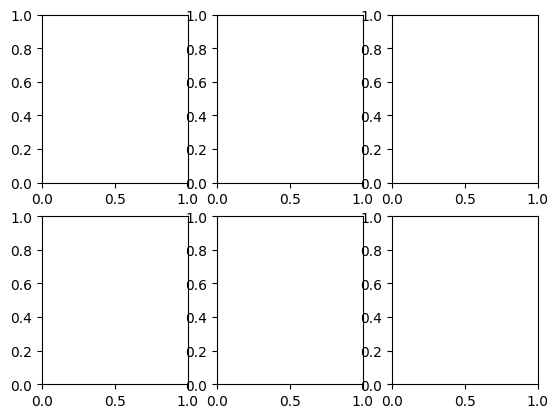

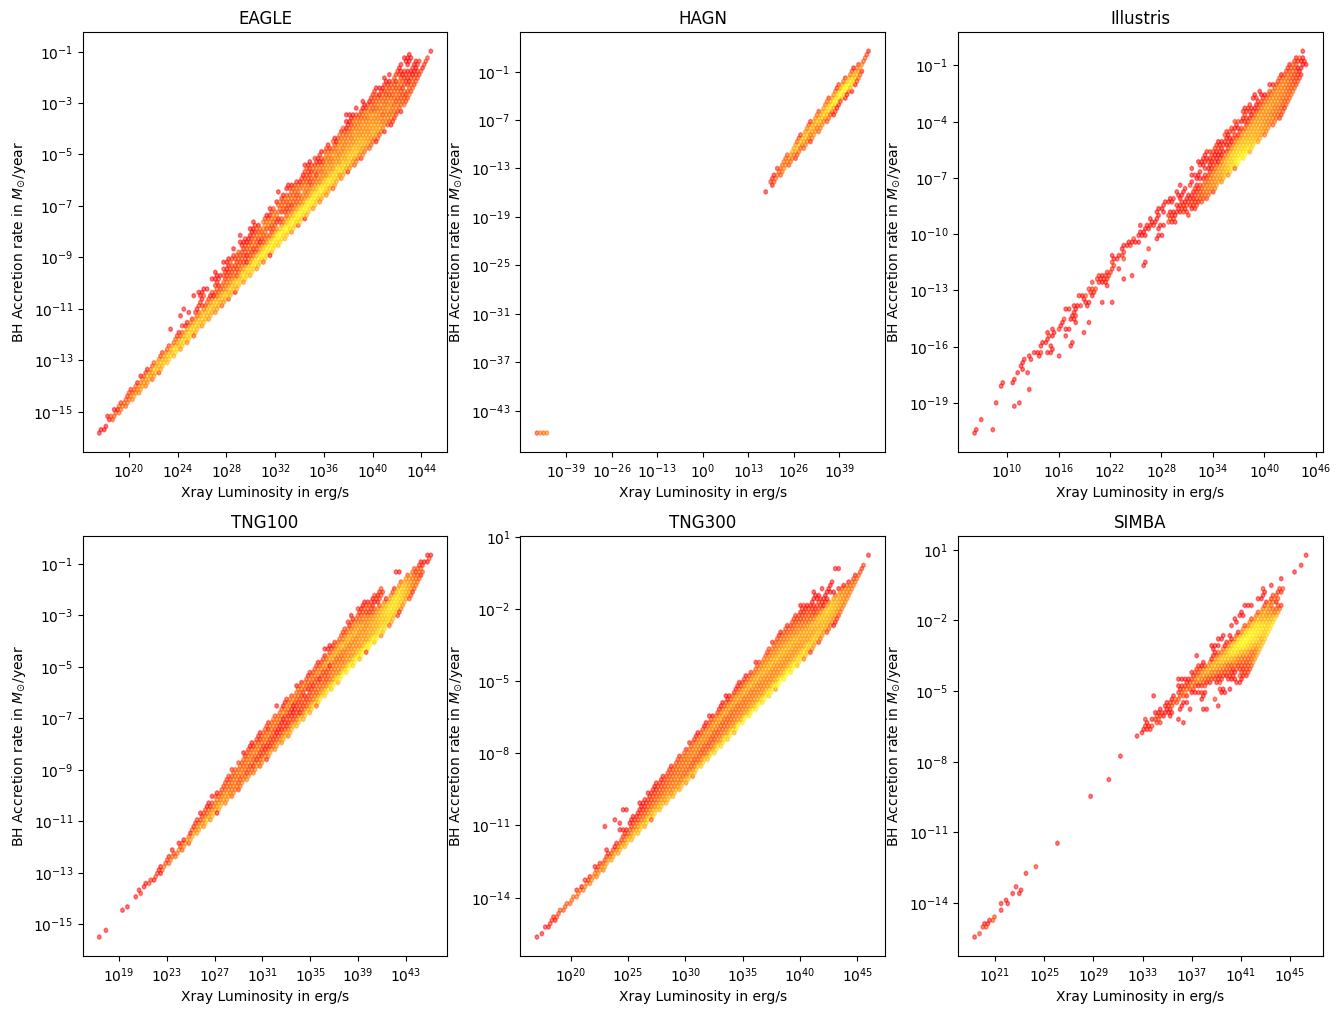

In [4]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['XrayLum'] = 10**(df['XrayLum'])
    stellar_mass = df['XrayLum'].to_numpy()
    massBH = df['BHdot'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Xray Luminosity in erg/s')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Accretion rate in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/XrayLum_vs_BHdot')
plt.show()

[8.7802304e-10 2.5328843e-11 3.1523015e-09 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08] [0.22116774 0.0501036  0.4712701  ... 0.03858288 0.24754842 0.14334783]
[2.44180895e-01 2.17104120e-03 8.49498636e-04 ... 5.45810559e-04
 1.51340697e-04 2.31844544e-05] [46.7394447   1.61110854  1.19220984 ...  0.39358398  1.20034826
  0.41212547]
[4.25777692e-03 1.01256476e-01 8.82529727e-05 ... 9.02205953e-07
 6.47818758e-07 1.06147233e-06] [9.4884340e-01 1.6691258e+00 2.7299320e-01 ... 7.0314604e-04 4.8414484e-04
 5.5142740e-04]
[2.35192860e-03 1.07717778e-02 2.31912240e-04 ... 6.33186232e-07
 1.02725308e-08 3.14384574e-09] [4.90754e-02 7.18051e-01 3.24843e-03 ... 9.76879e-03 1.21625e-03
 3.75567e-04]
[7.72870126e-03 7.80819242e-03 5.10372492e-04 ... 3.79127252e-07
 1.30017818e-07 3.21319866e-07] [3.58998e+00 1.91190e+00 2.20183e-01 ... 4.01886e-03 5.65408e-03
 3.31755e-03]
[4.27138433e-02 2.31054813e-01 5.85246062e-06 ... 2.81859568e-04
 9.36308410e-04 9.56019794e-04] [3.24956131e+01 2.110240

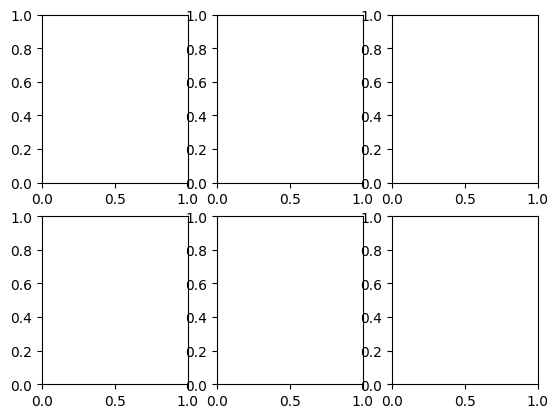

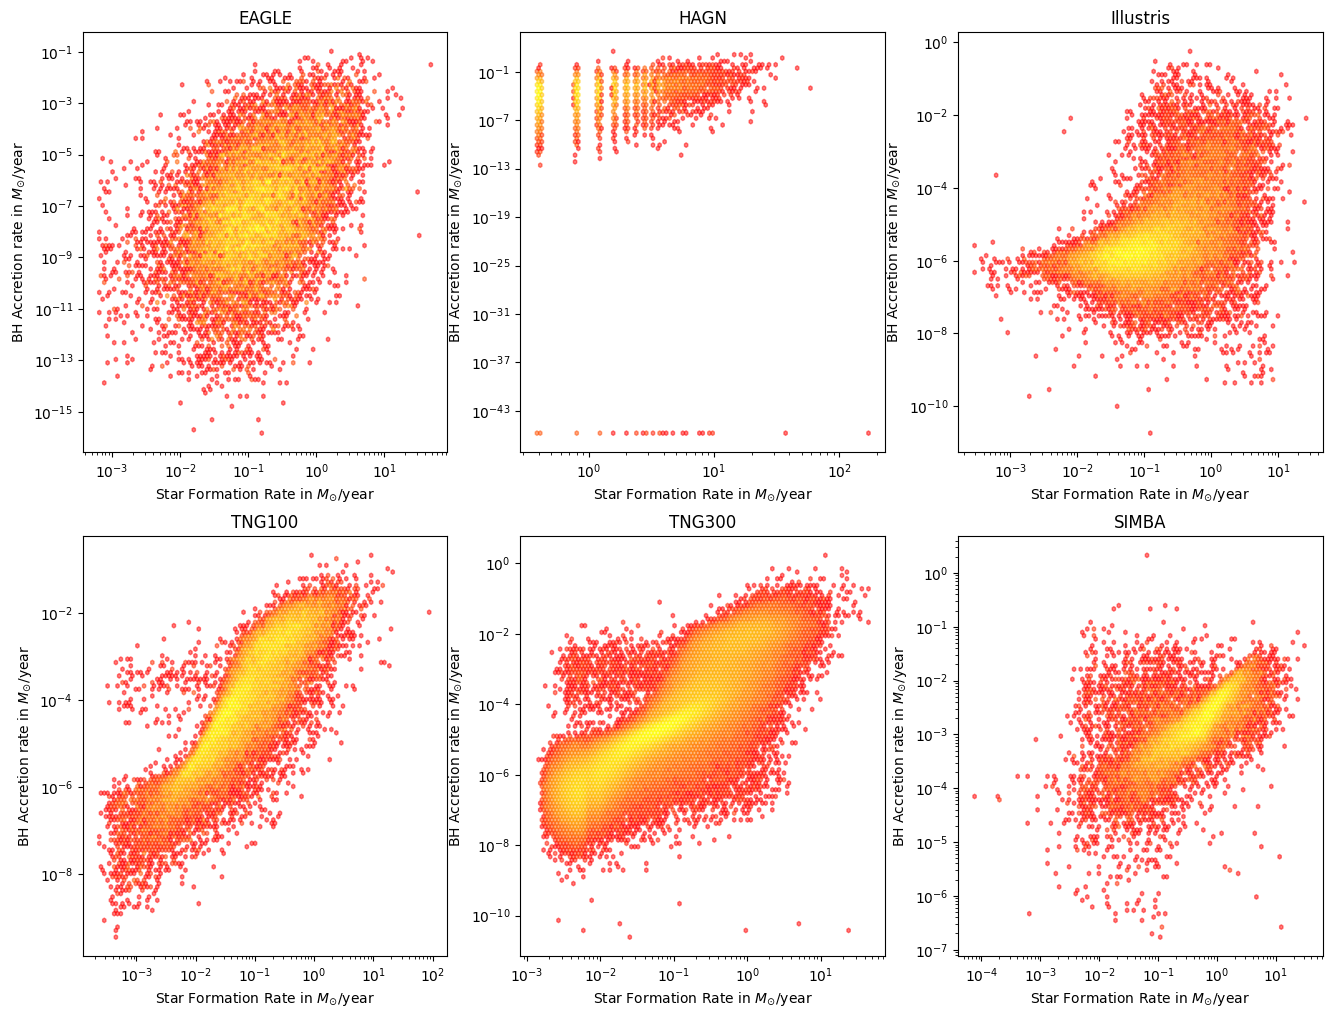

In [5]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    #df_data['XrayLum'] = 10**(df_data['XrayLum'])
    stellar_mass = df['SFR'].to_numpy()
    massBH = df['BHdot'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Star Formation Rate in $M_{\odot}$/year')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Accretion rate in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/sfr_vs_BHdot')
plt.show()

[8.7802304e-10 2.5328843e-11 3.1523015e-09 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08] [1.14880967e-11 5.87366031e-12 2.51406868e-11 ... 3.42496201e-11
 1.58149195e-10 6.93010900e-11]
[2.44180895e-01 2.17104120e-03 8.49498636e-04 ... 5.45810559e-04
 1.51340697e-04 2.31844544e-05] [3.04095281e-11 4.36970041e-12 3.00759294e-12 ... 3.52358087e-10
 1.98109962e-10 7.17863557e-11]
[4.25777692e-03 1.01256476e-01 8.82529727e-05 ... 9.02205953e-07
 6.47818758e-07 1.06147233e-06] [3.33727537e-12 4.46049572e-12 1.18363039e-12 ... 1.22380086e-12
 7.43763434e-13 8.94260995e-13]
[2.35192860e-03 1.07717778e-02 2.31912240e-04 ... 6.33186232e-07
 1.02725308e-08 3.14384574e-09] [1.29196984e-13 1.68583095e-12 2.50901218e-14 ... 1.39463261e-10
 6.20294642e-11 4.28363028e-11]
[7.72870126e-03 7.80819242e-03 5.10372492e-04 ... 3.79127252e-07
 1.30017818e-07 3.21319866e-07] [1.51305177e-10 7.53086821e-11 2.46326154e-11 ... 1.34338799e-10
 1.28394986e-10 2.88151184e-10]
[4.27138433e-02 2.31054813e-01 5.852

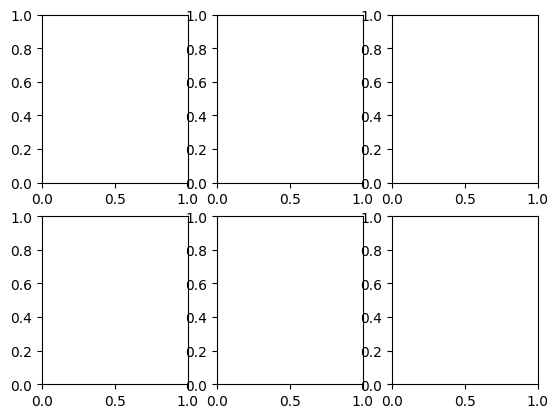

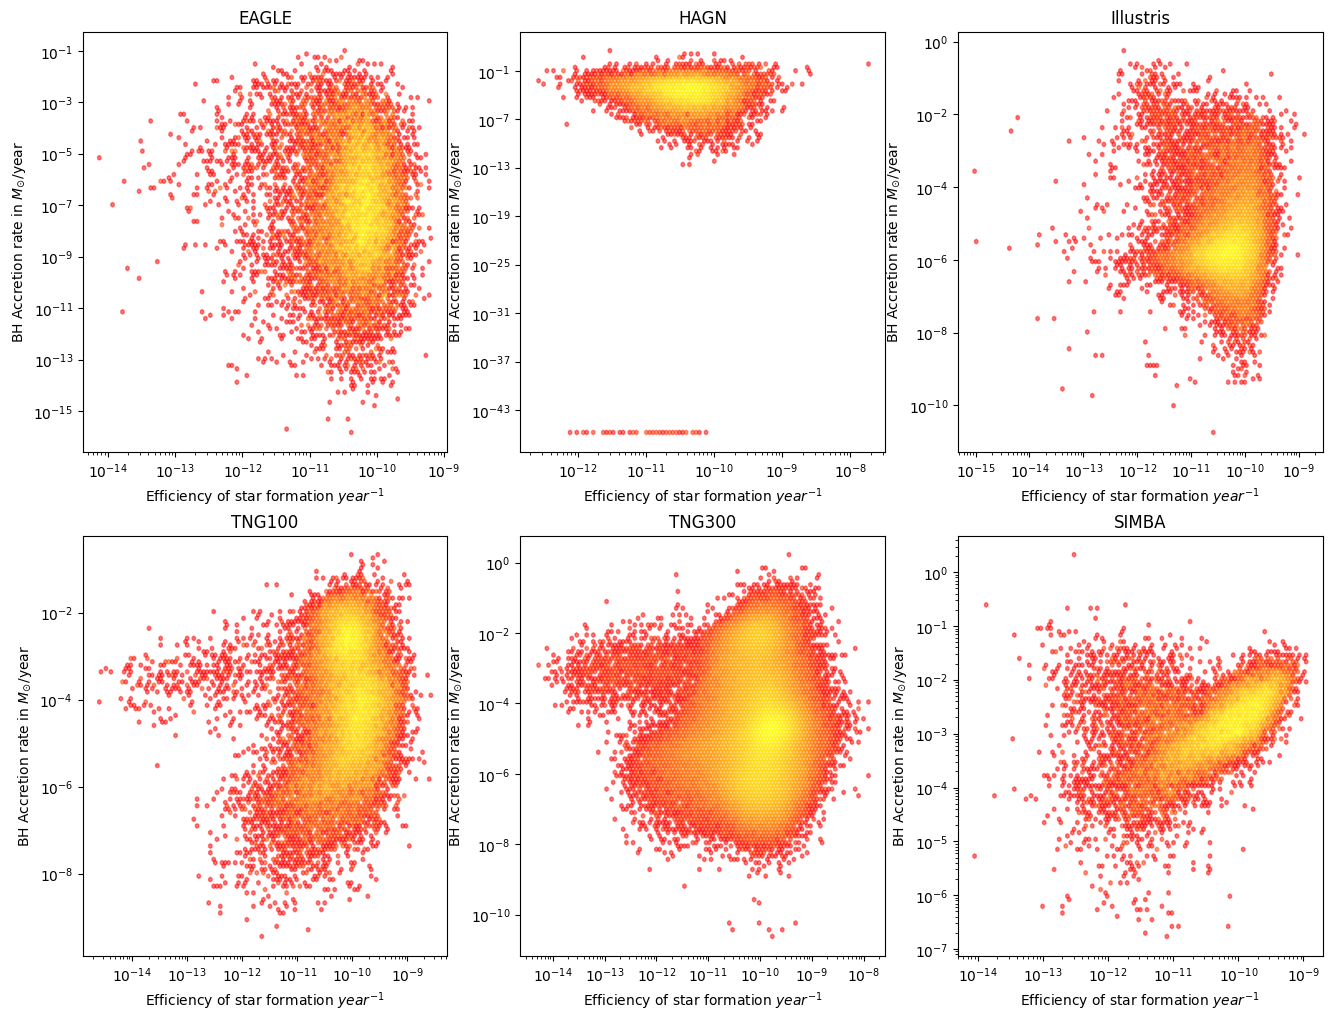

In [5]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    #df_data['XrayLum'] = 10**(df_data['XrayLum'])
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    stellar_mass = sfr/stellar_mass
    massBH = df['BHdot'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Efficiency of star formation $year^{-1}$')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Accretion rate in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/efficiency_vs_BHdot')
plt.show()